In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Assignment/attribution_data_market.csv')

In [ ]:
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            586737 non-null  object 
 1   time              586737 non-null  object 
 2   interaction       586737 non-null  object 
 3   conversion        586737 non-null  int64  
 4   conversion_value  586737 non-null  float64
 5   channel           586737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


In [ ]:
df.isna().sum()

cookie              0
time                0
interaction         0
conversion          0
conversion_value    0
channel             0
dtype: int64

In [ ]:
df['channel'].unique()

array(['Instagram', 'Online Display', 'Paid Search', 'Facebook',
       'Online Video'], dtype=object)

In [ ]:
df['cookie'].unique()

array(['00000FkCnDfDDf0iC97iC703B', '0000nACkD9nFkBBDECD3ki00E',
       '0003EfE37E93D0BC03iBhBBhF', ..., 'ooooEiB0CCoEf9fiiC90Dfhfk',
       'ooooiBh70D3k3BfAhDFfii9h7', 'ooooohAFofEnonEikhAi3fF9o'],
      dtype=object)

In [ ]:
df['interaction'].unique()

array(['impression', 'conversion'], dtype=object)

In [ ]:
df['conversion'].unique()

array([0, 1])

In [ ]:
df['time'].head()

0    2018-07-03T13:02:11Z
1    2018-07-17T19:15:07Z
2    2018-07-24T15:51:46Z
3    2018-07-29T07:44:51Z
4    2018-07-03T09:44:57Z
Name: time, dtype: object

In [ ]:
df['time'] = pd.to_datetime(df['time']).dt.date

In [ ]:
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03,impression,0,0.0,Paid Search


MARKETING CHANNEL


In [ ]:
df['channel'].value_counts()

Facebook          175741
Paid Search       151440
Online Video      113302
Instagram          75201
Online Display     71053
Name: channel, dtype: int64

In [ ]:
df['conversion'].value_counts()

0    569098
1     17639
Name: conversion, dtype: int64

In [ ]:
df['interaction'].value_counts()

impression    569098
conversion     17639
Name: interaction, dtype: int64

In [ ]:
print('Unique total users: {}'.format(df['cookie'].nunique()))
print("Unique users converted: {}".format(df.loc[df['conversion']==1,'cookie'].nunique()))

Unique total users: 240108
Unique users converted: 17639


In [ ]:
# user_converted/total_users
17639/240108*100

7.346277508454528

MARKETING CHANNEL ANALYSIS

In [ ]:
channel_count=df['channel'].value_counts(sort=True,ascending=False)
channel_count

Facebook          175741
Paid Search       151440
Online Video      113302
Instagram          75201
Online Display     71053
Name: channel, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


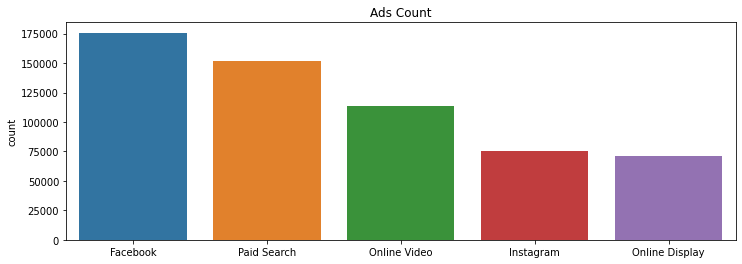

In [ ]:
plt.figure(figsize=(12,4))
ax=sns.countplot(df['channel'],order=channel_count.index)
plt.xlabel("")
plt.title("Ads Count",fontsize=12);

In [ ]:
#pivoting the ads count by channel

daily_ads_count=df.pivot_table(values="cookie",index="time", columns="channel", aggfunc=len)
daily_ads_count.head(10)

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
time,,,,,
2018-07-01,5037,2107,2572,1649,3215
2018-07-02,6165,2629,2456,2407,5895
2018-07-03,5438,2347,2428,2397,8665
2018-07-04,5856,2447,2445,2330,8496
2018-07-05,5634,2325,6,2152,5851
2018-07-06,5289,2273,1843,1589,3873
2018-07-07,5747,2442,2173,2306,4907
2018-07-08,5409,2277,7,2867,6627
2018-07-09,4949,2113,2648,3656,5237


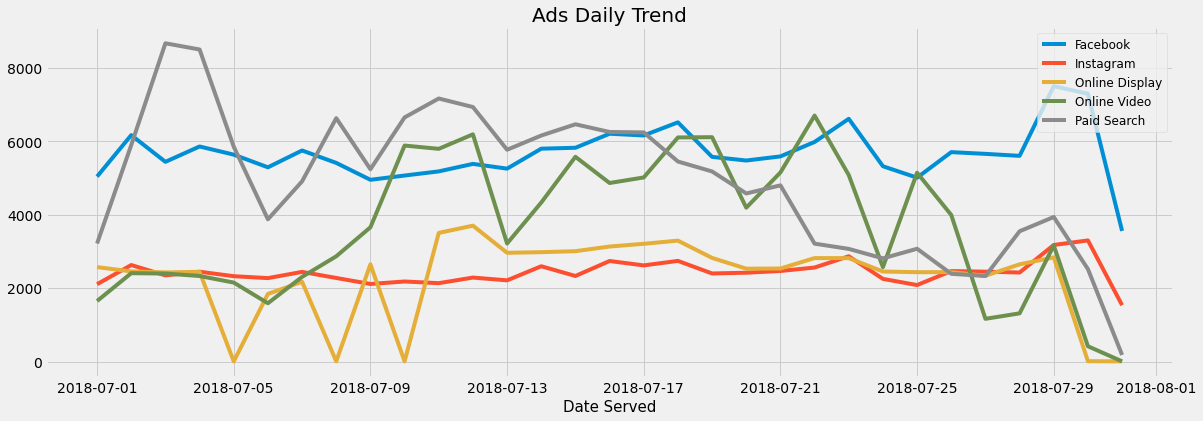

In [ ]:
plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15);
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12);

- Facebook merupakan media channel marketing yang cenderung lebih baik dalam hal kestabilan dibandingkan media channel marketing yg lain meskipun fluktuatif

- Paid Seacrh merupakan media channel marketing yang tinggi namun memiliki fluktiasi yang ekstrim 

- Insta, Oneline display , online video merupakan media online yang tidak begitu baik 

In [ ]:
conversions=df.groupby('channel')['conversion'].sum()
ads=df.groupby('channel')['conversion'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df

,conversion,conversion
channel,,
Facebook,5301,175741
Instagram,2244,75201
Online Display,2139,71053
Online Video,3408,113302
Paid Search,4547,151440


In [ ]:
conversion_df.columns=['conversions','ads_served']

In [ ]:
conversion_df['conversion_rate']=conversion_df['conversions']/conversion_df['ads_served']
conversion_df

,conversions,ads_served,conversion_rate
channel,,,
Facebook,5301,175741,0.030164
Instagram,2244,75201,0.029840
Online Display,2139,71053,0.030104
Online Video,3408,113302,0.030079
Paid Search,4547,151440,0.030025


**Facebook Merupakan media channel marketing yang memiliki conversion rate terbaik (paling tinggi) diantara yang lain sedangkan instagram merupakan media channel marketing yang memiliki conversion rate terendah diantara yang lain. maka seharusnya untuk mengoptimasi sangat disarankan menggunakan Media Facebook.**

Conversion Value

In [ ]:
df['conversion_value'].value_counts()


0.0    569098
6.5      3509
6.0      3487
5.0      1841
7.5      1833
5.5      1792
7.0      1780
8.0       866
4.5       863
4.0       835
8.5       833
Name: conversion_value, dtype: int64

In [ ]:
df1= df[df['conversion']>0]

In [ ]:
Avg_conversion_value=df1.groupby('channel')['conversion_value'].mean()
Avg_ads_conversion_value=df.groupby('channel')['conversion_value'].count()
conversion_df_avg=pd.concat([Avg_conversion_value,Avg_ads_conversion_value],axis=1)
conversion_df_avg

,conversion_value,conversion_value
channel,,
Facebook,6.252311,175741
Instagram,6.256462,75201
Online Display,6.217158,71053
Online Video,6.284624,113302
Paid Search,6.230812,151440
